# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [41]:
sns.set(style="whitegrid")

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
# boston['feature_names']  # nombres de los atributos para cada columna de 'data'

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [8]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

1. El conjunto de datos reune diferentes caracteristicas sobre inmuebles del barrio de Boston 
2. La variable objetivo parece ser un puntaje respecto a la calidad del inmueble segun sus caracteristicas.
3. Tenemos 13 atributos con los que podemos trabajar, estos son:
    - CRIM     tasa de criminalidad per cápita por ciudad
    - ZN       proporción de tierra residencial dividida en zonas para lotes de más de 25,000 pies cuadrados.
    - INDUS    proporción de acres de negocios no minoristas por ciudad
    - CHAS     Variable ficticia de contacto con superficie de agua (= 1 si el tramo limita con el río; 0 en caso contrario).
    - NOX      concentración de óxidos nítricos (partes por 10 millones)
    - RM       número promedio de habitaciones por vivienda
    - AGE      proporción de unidades ocupadas por sus propietarios construidas antes de 1940
    - DIS      distancias ponderadas a cinco centros de empleo de Boston
    - RAD      índice de accesibilidad a carreteras radiales
    - TAX      tasa de impuesto a la propiedad de valor total por $ 10,000
    - PTRATIO  relación alumno-profesor por localidad
    - B        1000 (Bk - 0.63) ^ 2 donde Bk es la proporción de gente de color por ciudad
    - LSTAT    % menor estado de la población
4. Supongo que los mas imprtantes en forma general serian: CRIM, LSTAT y TAX.
5. 

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

#### Pantallazo general de todos los datos

Text(0.5, 0.98, 'Relacion de cada variable con la variable objetivo')

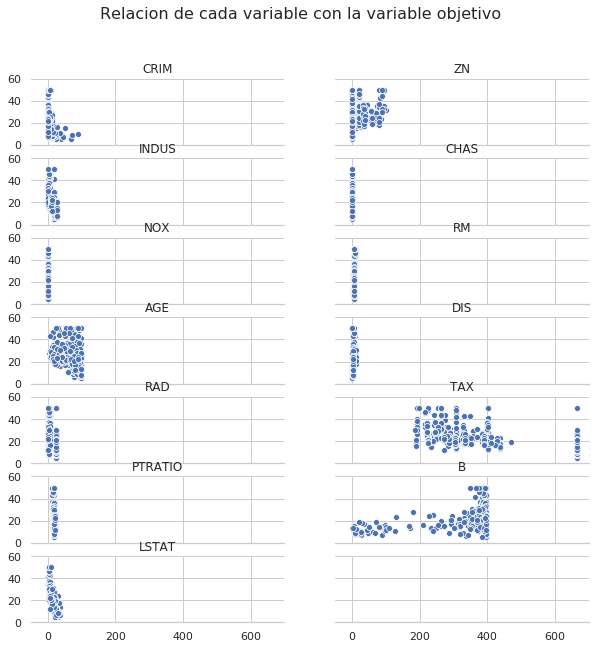

In [74]:
fig, axes = plt.subplots(7, 2, figsize=(10, 10), sharex=True, sharey=True)
sns.despine(left=True)

row = 0
column = 0
features = boston['feature_names']

for feature in features:
    selector = (boston['feature_names'] == feature)
    sns.scatterplot(X[:, selector].ravel(), y, ax=axes[column, row])
    axes[column, row].title.set_text(str(feature))
    axes[column, row].set_ylabel('')
    axes[column, row].set_xlabel('')
    if row == 1:
        row = 0
        column+=1
    else:
        row = 1
plt.xlim(-50, 700)
plt.ylim(0, 60)
fig.suptitle('Relacion de cada variable con la variable objetivo', fontsize=16)

#### Vista detallada de la relación de cada una de las variables

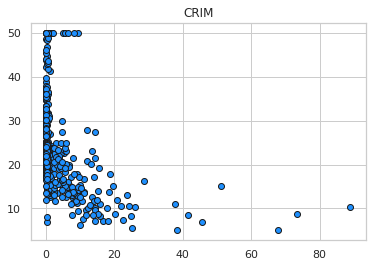

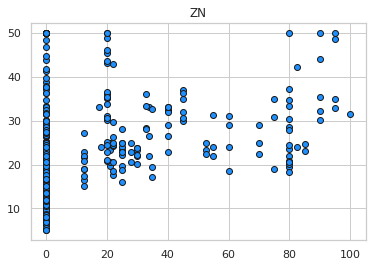

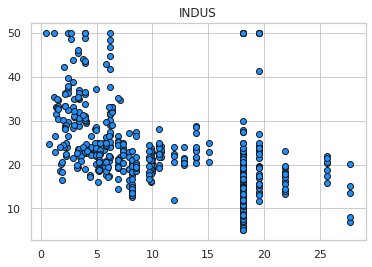

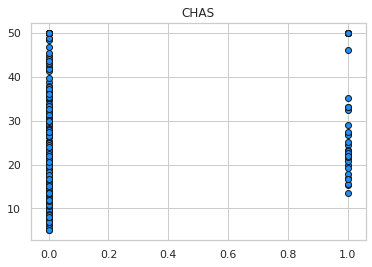

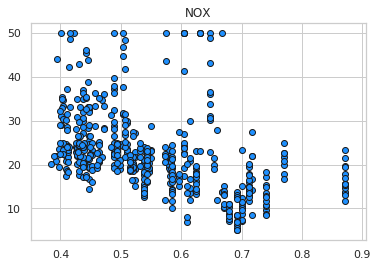

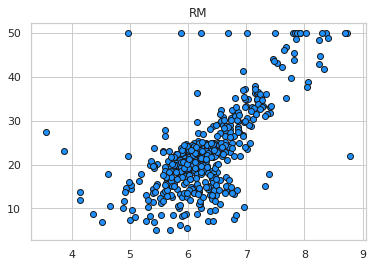

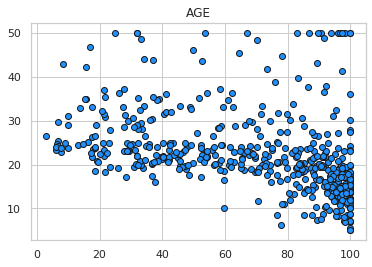

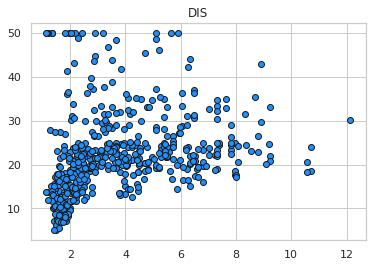

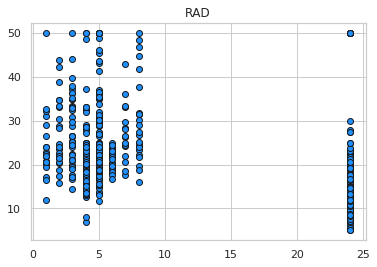

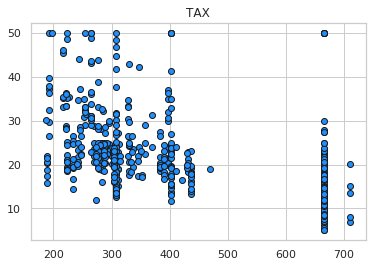

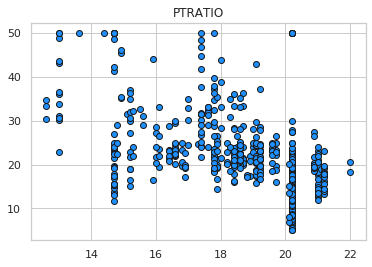

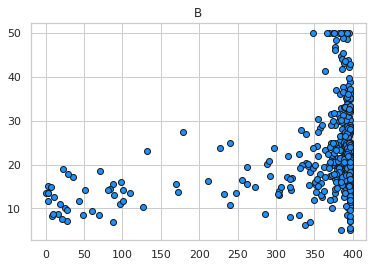

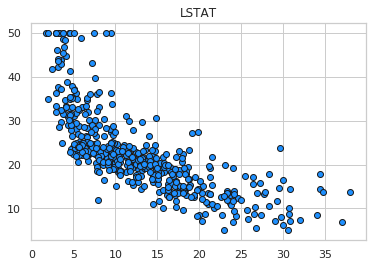

In [76]:
features = boston['feature_names']
for feature in features:
    selector = (boston['feature_names'] == feature)
    plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k")
    plt.title(feature)
    plt.show()

In [85]:
pd.DataFrame(X, columns=boston['feature_names']).describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [150]:
pd.DataFrame(X, columns=boston['feature_names'])[['CRIM', 'LSTAT', 'TAX']].describe()

,CRIM,LSTAT,TAX
count,506.000000,506.000000,506.000000
mean,3.613524,12.653063,408.237154
std,8.601545,7.141062,168.537116
min,0.006320,1.730000,187.000000
25%,0.082045,6.950000,279.000000
50%,0.256510,11.360000,330.000000
75%,3.677083,16.955000,666.000000
max,88.976200,37.970000,711.000000


## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [143]:
feature = 'LSTAT' 
selector = (boston['feature_names'] == feature)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [144]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train_f, y_train)

LinearRegression()

In [145]:
y_train_pred = linear.predict(X_train_f)
y_test_pred = linear.predict(X_test_f)

In [210]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error}')
print(f'Test error: {test_error}')

Train error: 24.825925516255133
Test error: 34.91322353914646


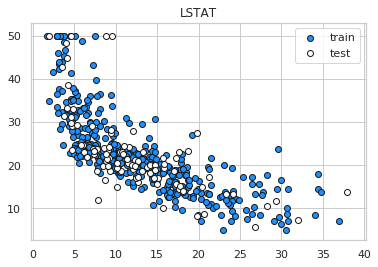

In [147]:
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

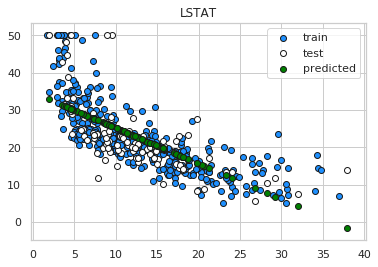

In [148]:
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.scatter(X_test_f, y_test_pred, facecolor="green", edgecolor="k", label="predicted")
plt.title(feature)
plt.legend()
plt.show()

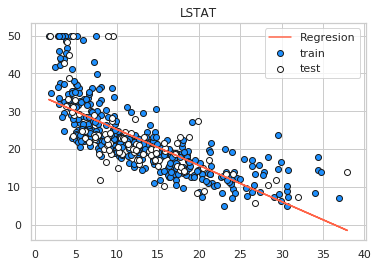

In [149]:
plt.plot(X[:, selector], linear.predict(X[:, selector]), color="tomato", label="Regresion")
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

Podemos observar una relacion con cierta dispersion, que a medida que tenemos mayor porcentaje de pobreza en la poblacion tenemos un menor puntaje. El modelo se ajusta relativamente bien pero creo que un tipo de curva se podria ajustar mejor.

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [278]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for degree in degrees: 
    
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_f, y_train)
    
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

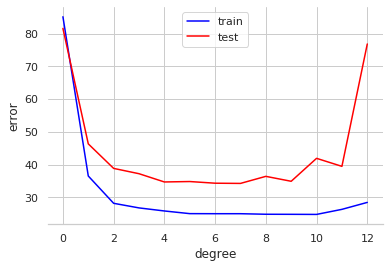

In [261]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
sns.despine(left=True)
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

Podemos observar que a partir del grado **9** empieza a haber un **sobreajuste** sobre los datos de entrenamiento, ya que el valor del error en test se dispara significativamente.

In [262]:
min_err = 100
for i in degrees:
    total_err = train_errors[i] + test_errors[i]
    if total_err < min_err:
        min_err = total_err
        degree = i
        totals.append(total_err)
print(f'El grado con menor error es {degree}, con:')
print(f'Train error: {train_errors[degree]}')
print(f'Test error: {test_errors[degree]}')

El grado con menor error es 7, con:
Train error: 25.013534969616202
Test error: 34.261129307570336


In [271]:
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train_f, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('linearregression', LinearRegression())])

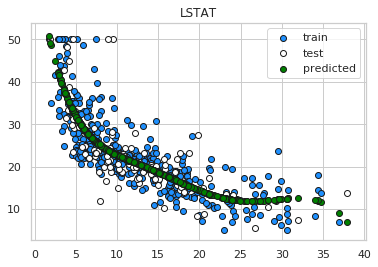

In [273]:
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.scatter(X[:, selector], model.predict(X[:, selector]),  facecolor="green", edgecolor="k", label="predicted")
plt.title(feature)
plt.legend()
plt.show()

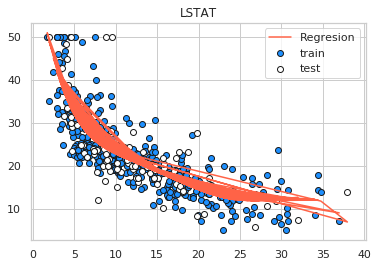

In [272]:
plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(X[:, selector], model.predict(X[:, selector]), color="tomato", label="Regresion")
plt.title(feature)
plt.legend()
plt.show()

Este modelo representa mucho mejor el comportamiento de los datos...

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [285]:
selector = (boston['feature_names'] == 'CRIM') | (boston['feature_names'] == 'TAX')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [286]:
train_errors = []
test_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for degree in degrees: 
    
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_fs, y_train)
    
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

ValueError: could not broadcast input array from shape (404,2) into shape (404,0)

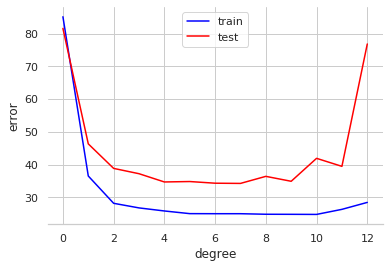

In [276]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, test_errors, color="red", label="test")
sns.despine(left=True)
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

## Más ejercicios (opcionales)

### Ejercicio 7: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 8: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
